In [1]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score
from torchinfo import summary
import torch.nn as nn
import argparse, os, json, sys
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import h5py
from EvalTools import *
sys.path.append("../model")
from PFINDataset import PFINDataset
from UQPFIN import UQPFIN as Model
%env HDF5_USE_FILE_LOCKING=FALSE

env: HDF5_USE_FILE_LOCKING=FALSE


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
print('\n'.join([f for f in os.listdir('.') if f.endswith('.h5')]))

RESULTS_UQPFIN_best_jetnet_0.5_skiptwz_ocmodel.h5
RESULTS_UQPFIN_best_jetnet_0_skiptwz.h5
RESULTS_UQPFIN_best_jetnet_nominal_skipwz.h5
RESULTS_UQPFIN_best_jetnet_nominal_skiptop.h5
RESULTS_UQPFIN_best_jetnet_0.1_skipwz_ocmodel.h5
RESULTS_UQPFIN_best_jetnet_0.1_skiptop.h5
RESULTS_UQPFIN_best_jetnet_nominal_skiptwz.h5
RESULTS_UQPFIN_Ensemble_skipwz.h5
RESULTS_UQPFIN_MCDO_skipwz.h5
RESULTS_UQPFIN_best_jetnet_0.5_skiptop_ocmodel.h5
RESULTS_UQPFIN_best_jetnet_0_skipwz.h5
RESULTS_UQPFIN_best_jetnet_0.1_skiptwz.h5
RESULTS_UQPFIN_Ensemble_skiptwz.h5
RESULTS_UQPFIN_Ensemble_skiptop.h5
RESULTS_UQPFIN_best_jetnet_0.1_skiptop_ocmodel.h5
RESULTS_UQPFIN_best_jetnet_nominal_baseline2.h5
RESULTS_UQPFIN_MCDO_skiptwz.h5
RESULTS_UQPFIN_MCDO_skiptop.h5
RESULTS_UQPFIN_best_jetnet_0.1_baseline.h5
RESULTS_UQPFIN_best_jetnet_0.5_skipwz_ocmodel.h5
RESULTS_UQPFIN_best_jetnet_0_skiptop.h5
RESULTS_UQPFIN_best_jetnet_nominal_baseline.h5
RESULTS_UQPFIN_best_jetnet_0.1_skiptwz_ocmodel.h5
RESULTS_UQPFIN_best_jetnet_0

skiptop


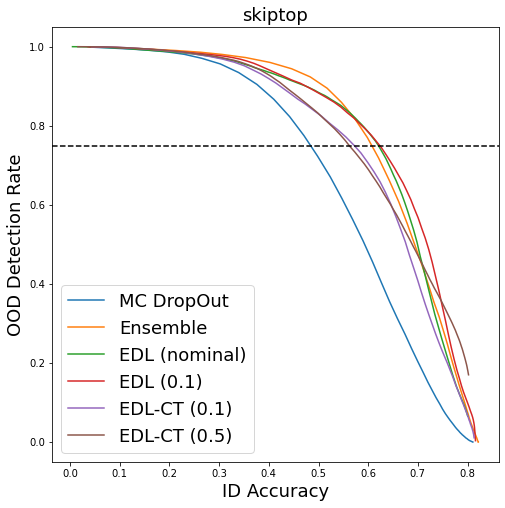

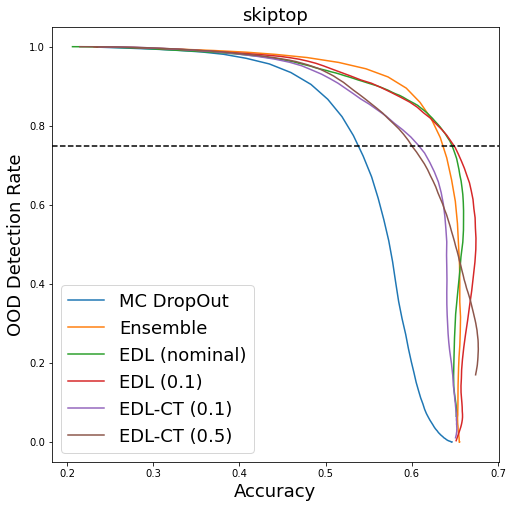

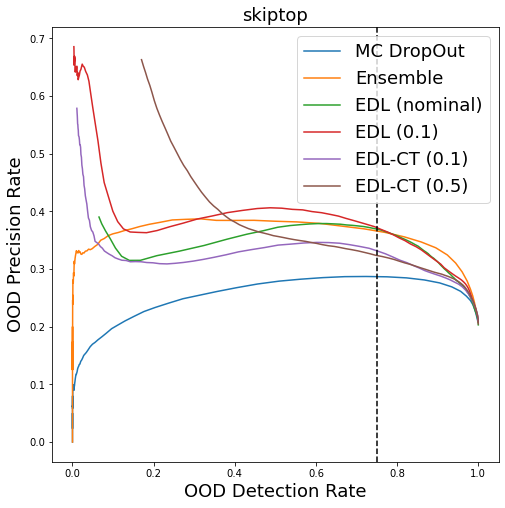

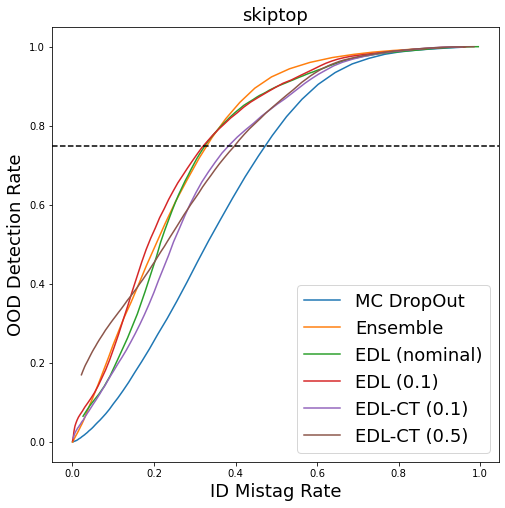




skiptwz


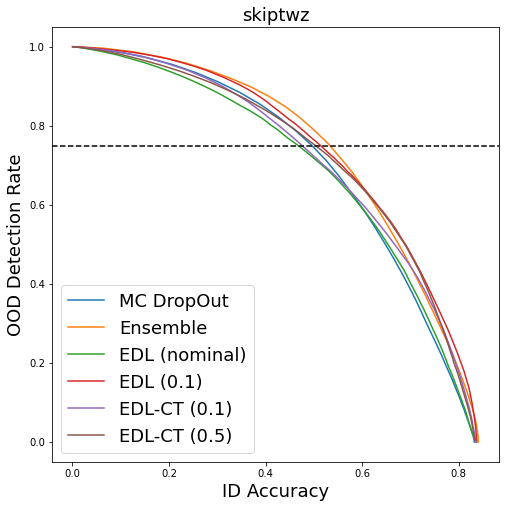

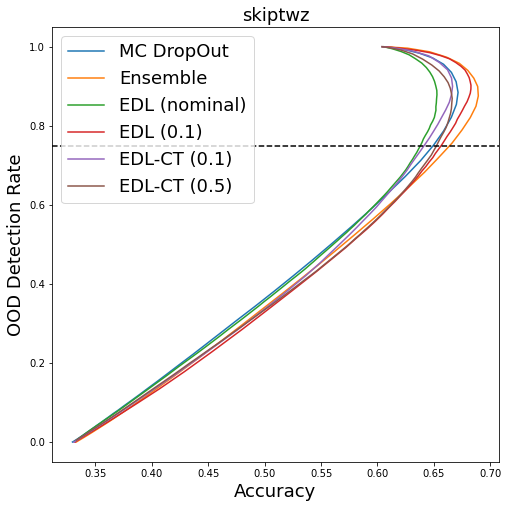

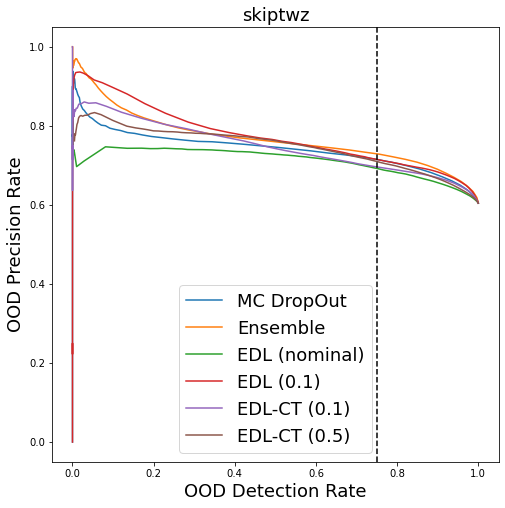

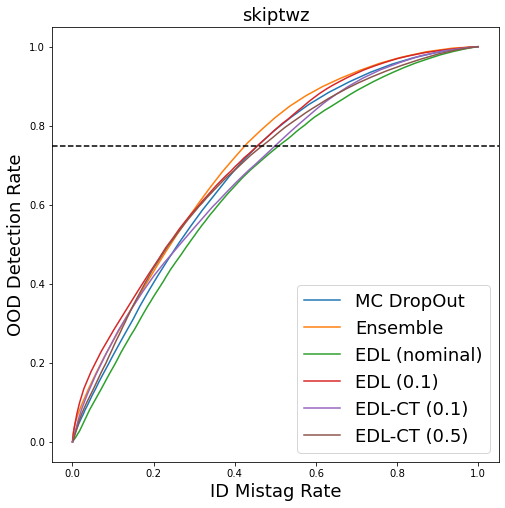




skipwz


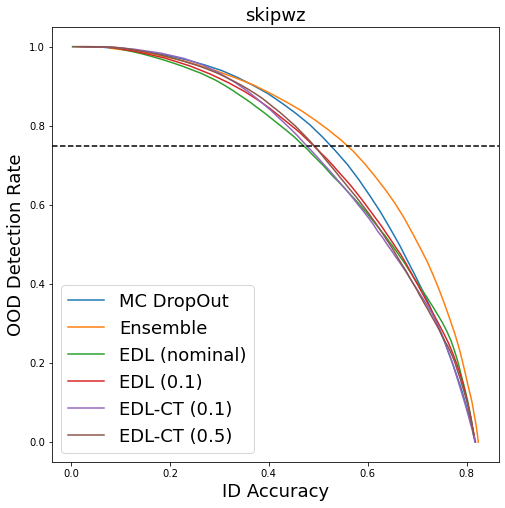

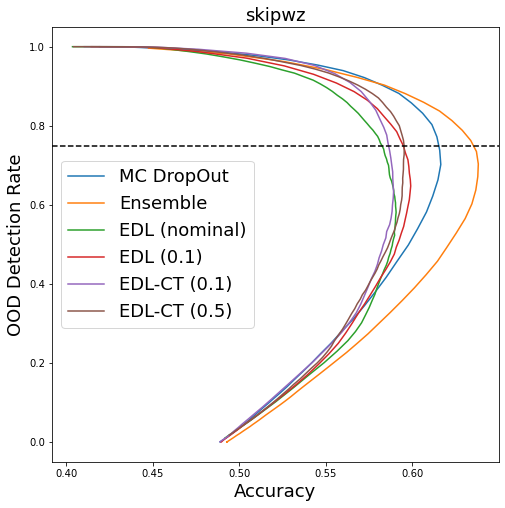

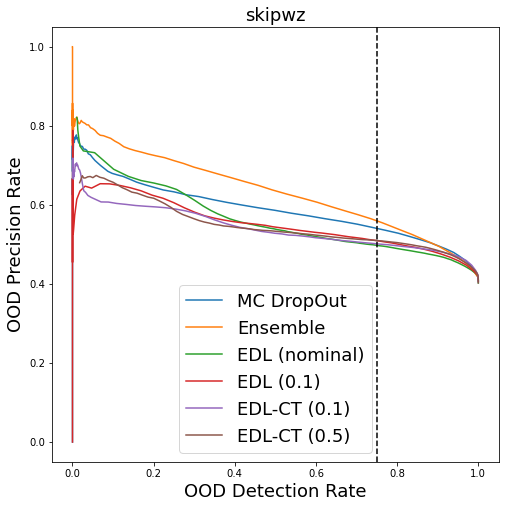

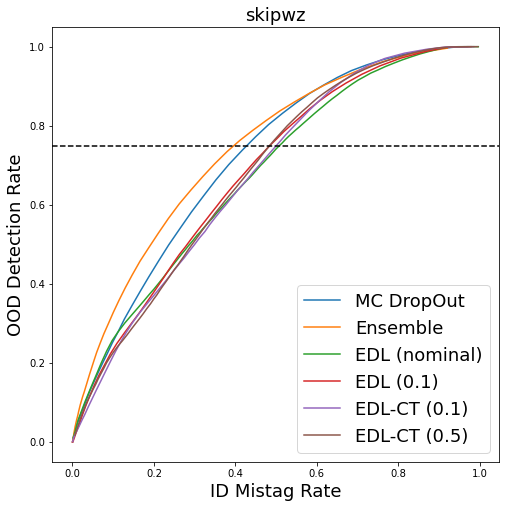

In [6]:
tags = ['skiptop', 'skiptwz', 'skipwz']

for tag in tags:
    print(tag)
    model_results = {}
    plotter_map = {}
    
    fnames = ["RESULTS_UQPFIN_MCDO_{}.h5",
              "RESULTS_UQPFIN_Ensemble_{}.h5",
              "RESULTS_UQPFIN_best_jetnet_nominal_{}.h5",
              "RESULTS_UQPFIN_best_jetnet_0.1_{}.h5",
              "RESULTS_UQPFIN_best_jetnet_0.1_{}_ocmodel.h5",
              "RESULTS_UQPFIN_best_jetnet_0.5_{}_ocmodel.h5",
              ]
    types = ["MC DropOut", "Ensemble", "EDL (nominal)", "EDL (0.1)", "EDL-CT (0.1)", "EDL-CT (0.5)" ]
    
    
    for ii, fname in enumerate(fnames):
        fname = fname.format(tag)
        f = h5py.File(fname, "r")
        model_results[types[ii]] = {'labels' : f['labels'][:], 
                                   'preds': f['preds'][:], 
                                   'maxprobs': f['maxprobs'][:],
                                   'sums':f['sums'][:], 
                                   'oods':f['oods'][:],
                                   'uncs': f['uncs'][:],
                                   'probs': f['probs'][:]}
        f.close()
        plotter_map[types[ii]] = PlotterTools(model_results[types[ii]], types[ii])

    
    
    
    fig, ax = plt.subplots(figsize=(8,8))
    for _t in types:
        plotter_map[_t].ODR_IDAcc(ax)
    ax.axhline(0.75, color = "k", linestyle= "--")
    ax.legend(fontsize = 18)
    ax.set_ylabel("OOD Detection Rate", fontsize = 18)
    ax.set_xlabel("ID Accuracy", fontsize = 18)
    ax.set_title(tag, fontsize=18)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(8,8))
    for _t in types:
        plotter_map[_t].ODR_Acc(ax)
    ax.axhline(0.75, color = "k", linestyle= "--")
    ax.legend(fontsize = 18)
    ax.set_ylabel("OOD Detection Rate", fontsize = 18)
    ax.set_xlabel("Accuracy", fontsize = 18)
    ax.set_title(tag, fontsize=18)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(8,8))
    for _t in types:
        plotter_map[_t].OCR_ODR(ax)
    ax.axvline(0.75, color = "k", linestyle= "--")
    ax.legend(fontsize = 18)
    ax.set_xlabel("OOD Detection Rate", fontsize = 18)
    ax.set_ylabel("OOD Precision Rate", fontsize = 18)
    ax.set_title(tag, fontsize=18)
    plt.show()
    
    
    
    fig, ax = plt.subplots(figsize=(8,8))
    for _t in types:
        plotter_map[_t].ODR_IMR(ax)
    ax.axhline(0.75, color = "k", linestyle= "--")
    ax.legend(fontsize = 18)
    ax.set_ylabel("OOD Detection Rate", fontsize = 18)
    ax.set_xlabel("ID Mistag Rate", fontsize = 18)
    ax.set_title(tag, fontsize=18)
    plt.show()
    
    print('\n\n')
    
    
    
